## <div style="text-align: center; color: green;">Project Title: Heart Disease Prediction</div>

### <div style="color: gray;">Step 1: Dataset Overview-</div>

#### <div style="color: green;">Import necessary libraries:</div>

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np

# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

# Import score libs
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 

import warnings
warnings.filterwarnings('ignore')

#### <div style="color: green;">Load Dataset:</div>

In [2]:
data = pd.read_csv('HeartDisease.csv')
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### <div style="color: green;">Dataset description:</div>
The dataset contains information related to heart disease, with a total of 303 records and 14 columns. Here's an overview:

- **Columns:**
  - **age:** Age of the individual (integer).
  - **gender:** Gender of the individual (0 = female, 1 = male).
  - **chest_pain:** Type of chest pain experienced (0-3, representing different types).
  - **rest_bps:** Resting blood pressure (mm Hg).
  - **cholestrol:** Serum cholesterol in mg/dl.
  - **fasting_blood_sugar:** Whether the fasting blood sugar is > 120 mg/dl (1 = true, 0 = false).
  - **rest_ecg:** Resting electrocardiographic results (0-2).
  - **thalach:** Maximum heart rate achieved.
  - **exer_angina:** Exercise-induced angina (1 = yes, 0 = no).
  - **old_peak:** ST depression induced by exercise relative to rest.
  - **slope:** Slope of the peak exercise ST segment (0-2).
  - **ca:** Number of major vessels (0-4) colored by fluoroscopy.
  - **thalassemia:** A blood disorder (0-3).
  - **target:** Presence of heart disease (1 = yes, 0 = no).
  
The target variable, target, indicates the presence (1) or absence (0) of heart disease.

### <div style="color: gray;">Step 2: Data Exploration and Preprocessing-</div>

#### <div style="color: green;"> Visualize Dataset:</div>

In [3]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [4]:
data.shape

(303, 14)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### <div style="color: green;"> Cleaning Data:</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

#### <div style="color: green;"> Exploratory Data Analysis (EDA):</div>

In [8]:
# Determine number of heart disease cases in dataset
yes = data[data['target'] == 1]
no = data[data['target'] == 0]
outlierFraction = len(yes)/float(len(no))
print(outlierFraction)
print('Heart Disease- "Yes": {}'.format(len(data[data['target'] == 1])))
print('Heart Disease- "No": {}'.format(len(data[data['target'] == 0])))

1.1956521739130435
Heart Disease- "Yes": 165
Heart Disease- "No": 138


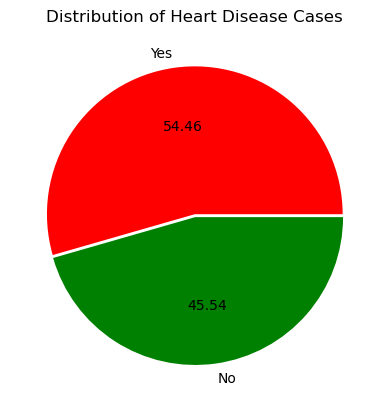

In [9]:
#Target Variable Distribution using pyplot

import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['Yes', 'No'],autopct='%0.2f', explode=(0, 0.02), colors=['red', 'green'])
plt.title('Distribution of Heart Disease Cases')
plt.show()

#### Observations:
In observation 54.46% Cases are present heart disease and 45.54% case patient don't have any heart disease. The data is quite balanced.

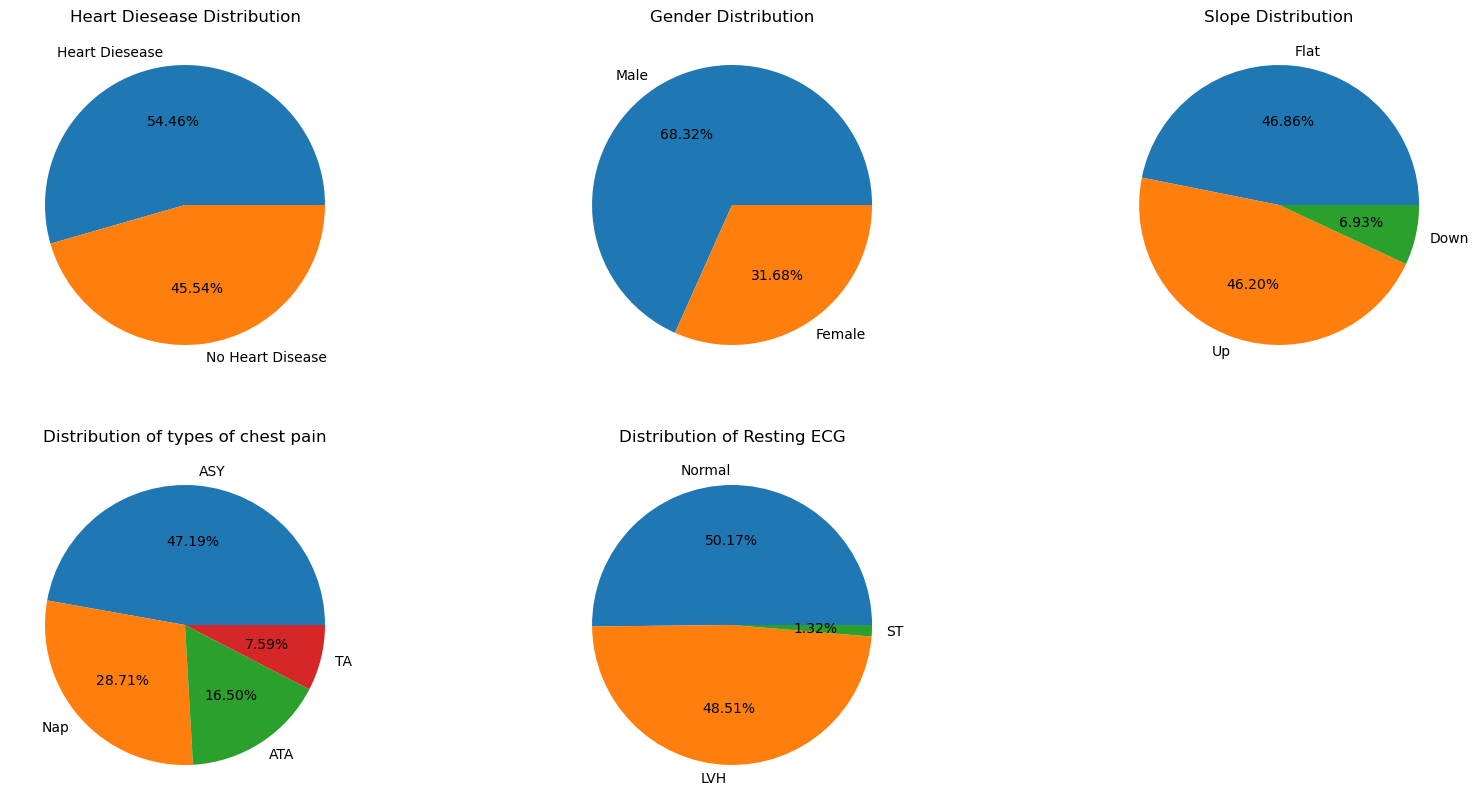

In [10]:
#Target Variable Distribution using pyplot

tdf=data['target'].value_counts().reset_index()
tdf1=data['gender'].value_counts().reset_index()
tdf2=data['chest_pain'].value_counts().reset_index()
tdf3=data['rest_ecg'].value_counts().reset_index()
tdf4=data['slope'].value_counts().reset_index()
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].pie(x=tdf['count'],labels=['Heart Diesease','No Heart Disease'],autopct='%.2f%%')
axes[0][0].set_title("Heart Diesease Distribution")
axes[0][1].pie(x=tdf1['count'],labels=['Male','Female'],autopct='%.2f%%')
axes[0][1].set_title("Gender Distribution")
axes[0][2].pie(x=tdf4['count'],labels=['Flat','Up','Down'],autopct='%.2f%%')
axes[0][2].set_title("Slope Distribution")
axes[1][0].pie(x=tdf2['count'],labels=['ASY', 'Nap', 'ATA', 'TA'],autopct='%.2f%%')
axes[1][0].set_title("Distribution of types of chest pain")
axes[1][1].pie(x=tdf3['count'],labels=['Normal', 'LVH','ST'],autopct='%.2f%%')
axes[1][1].set_title("Distribution of Resting ECG")
axes[1][2].set_visible(False)
plt.show()

#### Observations:
- The dataset is balanced with respect to the target variable.
- The Gender distribution is skewed towards Males.
- The most common type of chest pain is ASY (asymptomatic) in this dataset followed by NAP (non-anginal pain).
- Resting ECG is normal in 50% of the cases in this dataset.

#### <div style="color: green;"> Handle Outliers:</div>

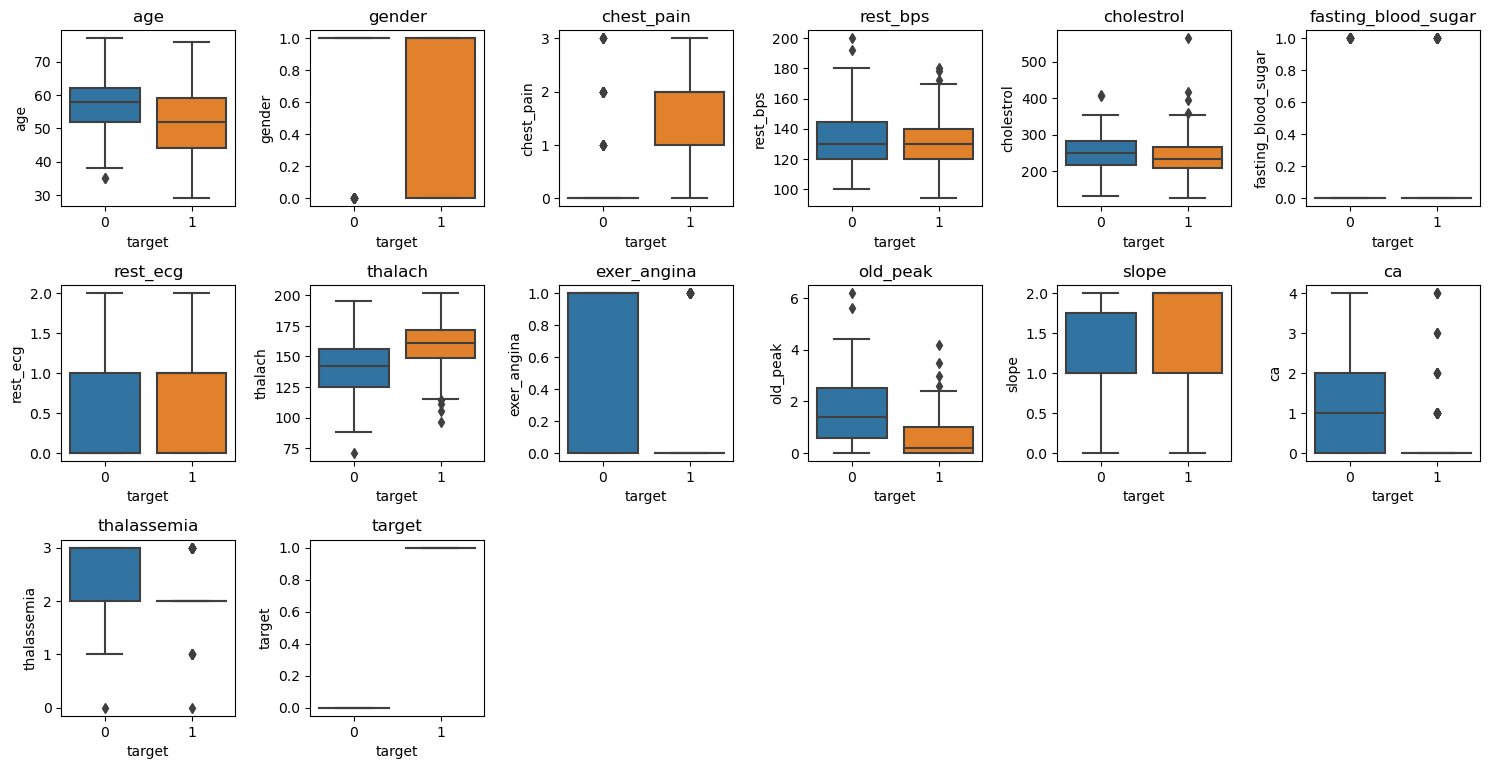

In [11]:
#to see outlier in data
data_numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(data_numeric_cols):
    plt.subplot(6, 6, i+1)
    sns.boxplot(x='target', y=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
# Handle Outlier

data_num = data.select_dtypes(include='number')

for column in data_num.columns:
    for i in data["target"].unique():
        selected_i = data[data["target"] == i]
        selected_column = selected_i[column]

        Q1 = selected_column.quantile(0.25)
        Q3 = selected_column.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = selected_column[(selected_column < lower_bound) | (selected_column > upper_bound)].index
        data.drop(index=outliers, inplace=True)
        print(column, i, outliers)

age 1 Index([], dtype='int64')
age 0 Index([227, 239], dtype='int64')
gender 1 Index([], dtype='int64')
gender 0 Index([167, 181, 182, 190, 204, 207, 213, 215, 216, 220, 223, 241, 246, 252,
       258, 260, 263, 266, 278, 289, 292, 296, 298, 302],
      dtype='int64')
chest_pain 1 Index([], dtype='int64')
chest_pain 0 Index([222, 228, 254, 259, 271, 286, 299], dtype='int64')
rest_bps 1 Index([8, 101, 110], dtype='int64')
rest_bps 0 Index([203, 248], dtype='int64')
cholestrol 1 Index([4, 28, 39, 85, 96], dtype='int64')
cholestrol 0 Index([], dtype='int64')
fasting_blood_sugar 1 Index([  0,  14,  23,  26,  29,  36,  60,  64,  76,  78,  83,  87,  90,  93,
        97,  99, 103, 106, 111, 136, 137],
      dtype='int64')
fasting_blood_sugar 0 Index([169, 170, 176, 197, 214, 217, 219, 231, 251, 269, 281, 282, 297, 300], dtype='int64')
rest_ecg 1 Index([], dtype='int64')
rest_ecg 0 Index([], dtype='int64')
thalach 1 Index([95, 139], dtype='int64')
thalach 0 Index([], dtype='int64')
exer_angina

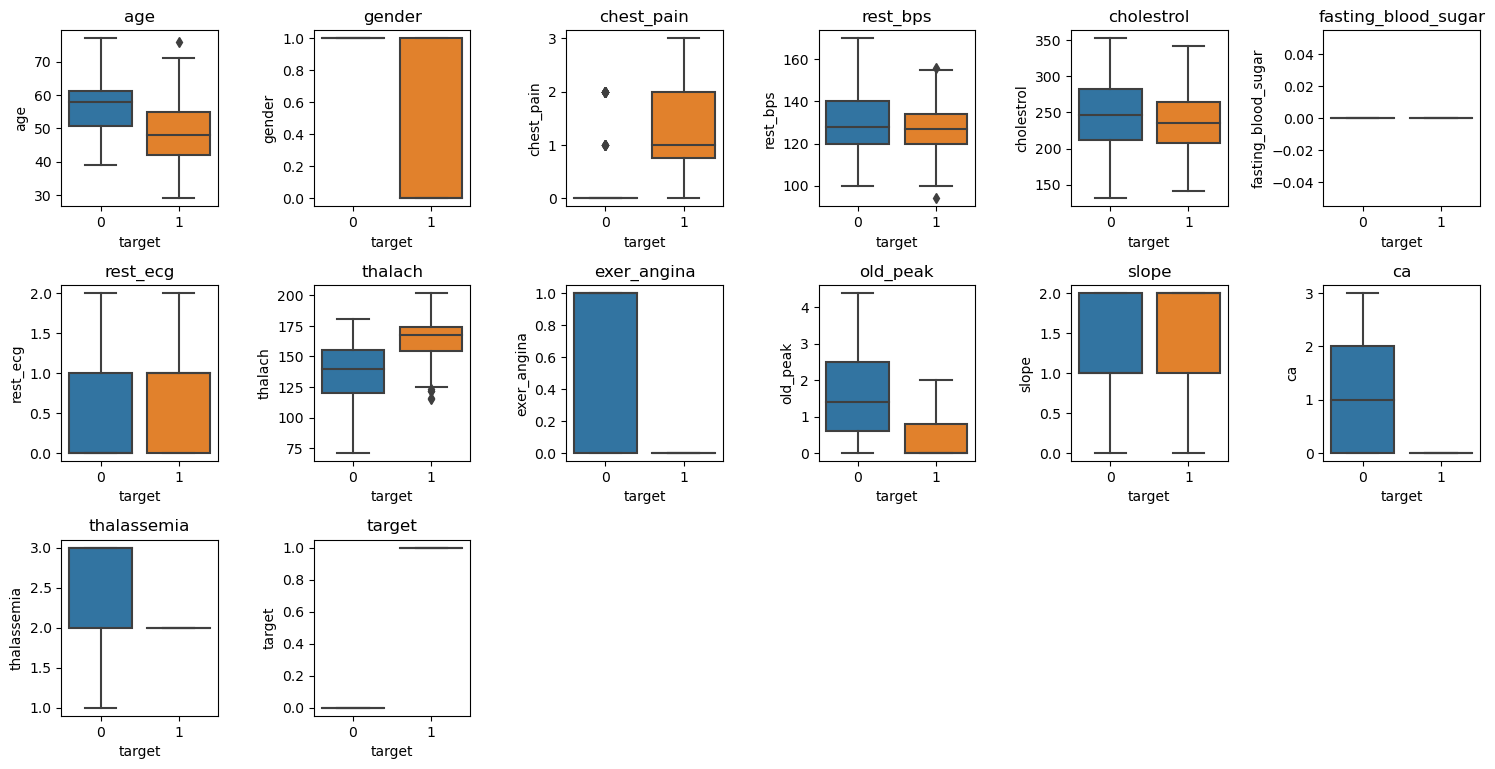

In [13]:
#to see cleaned data
data_numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(data_numeric_cols):
    plt.subplot(6, 6, i+1)
    sns.boxplot(x='target', y=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

#### <div style="color: green;"> Correlation Matrix Analysis:</div>

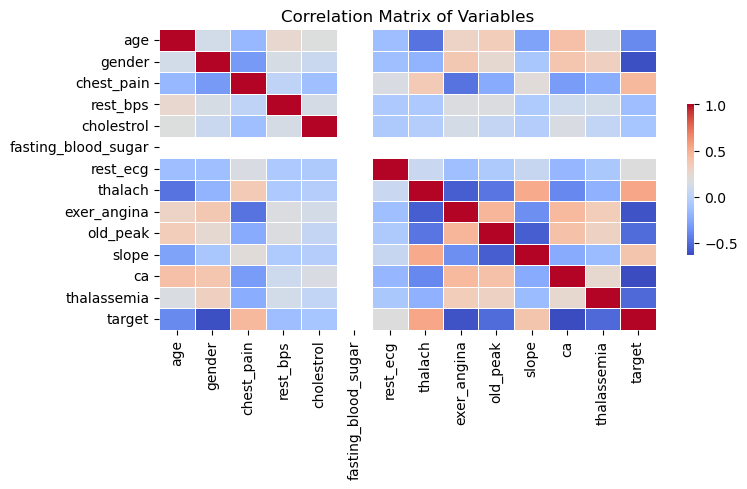

In [14]:
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks()
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

#### Observations:

  - Variables like chest_pain, slope, and thalach (maximum heart rate achieved) show a positive correlation with the target (indicating the presence of heart disease).

  - Variables such as ca (number of major vessels colored by fluoroscopy), old_peak (ST depression induced by exercise relative to rest), and exer_angina (exercise-induced angina) have a strong negative correlation with the target, suggesting these features are inversely related to the presence of heart disease.

  - Chest pain and ca seem to have an inverse relationship.
  - Rest_bps (resting blood pressure) and cholesterol show little to no correlation with the target, which is surprising as they are commonly considered risk factors in heart disease.

  - Fasting blood sugar and rest_ecg appear to have minimal correlation with the target variable, indicating they might not be as significant for predicting heart disease in this dataset.

#### <div style="color: green;"> Histogram Analysis:</div>

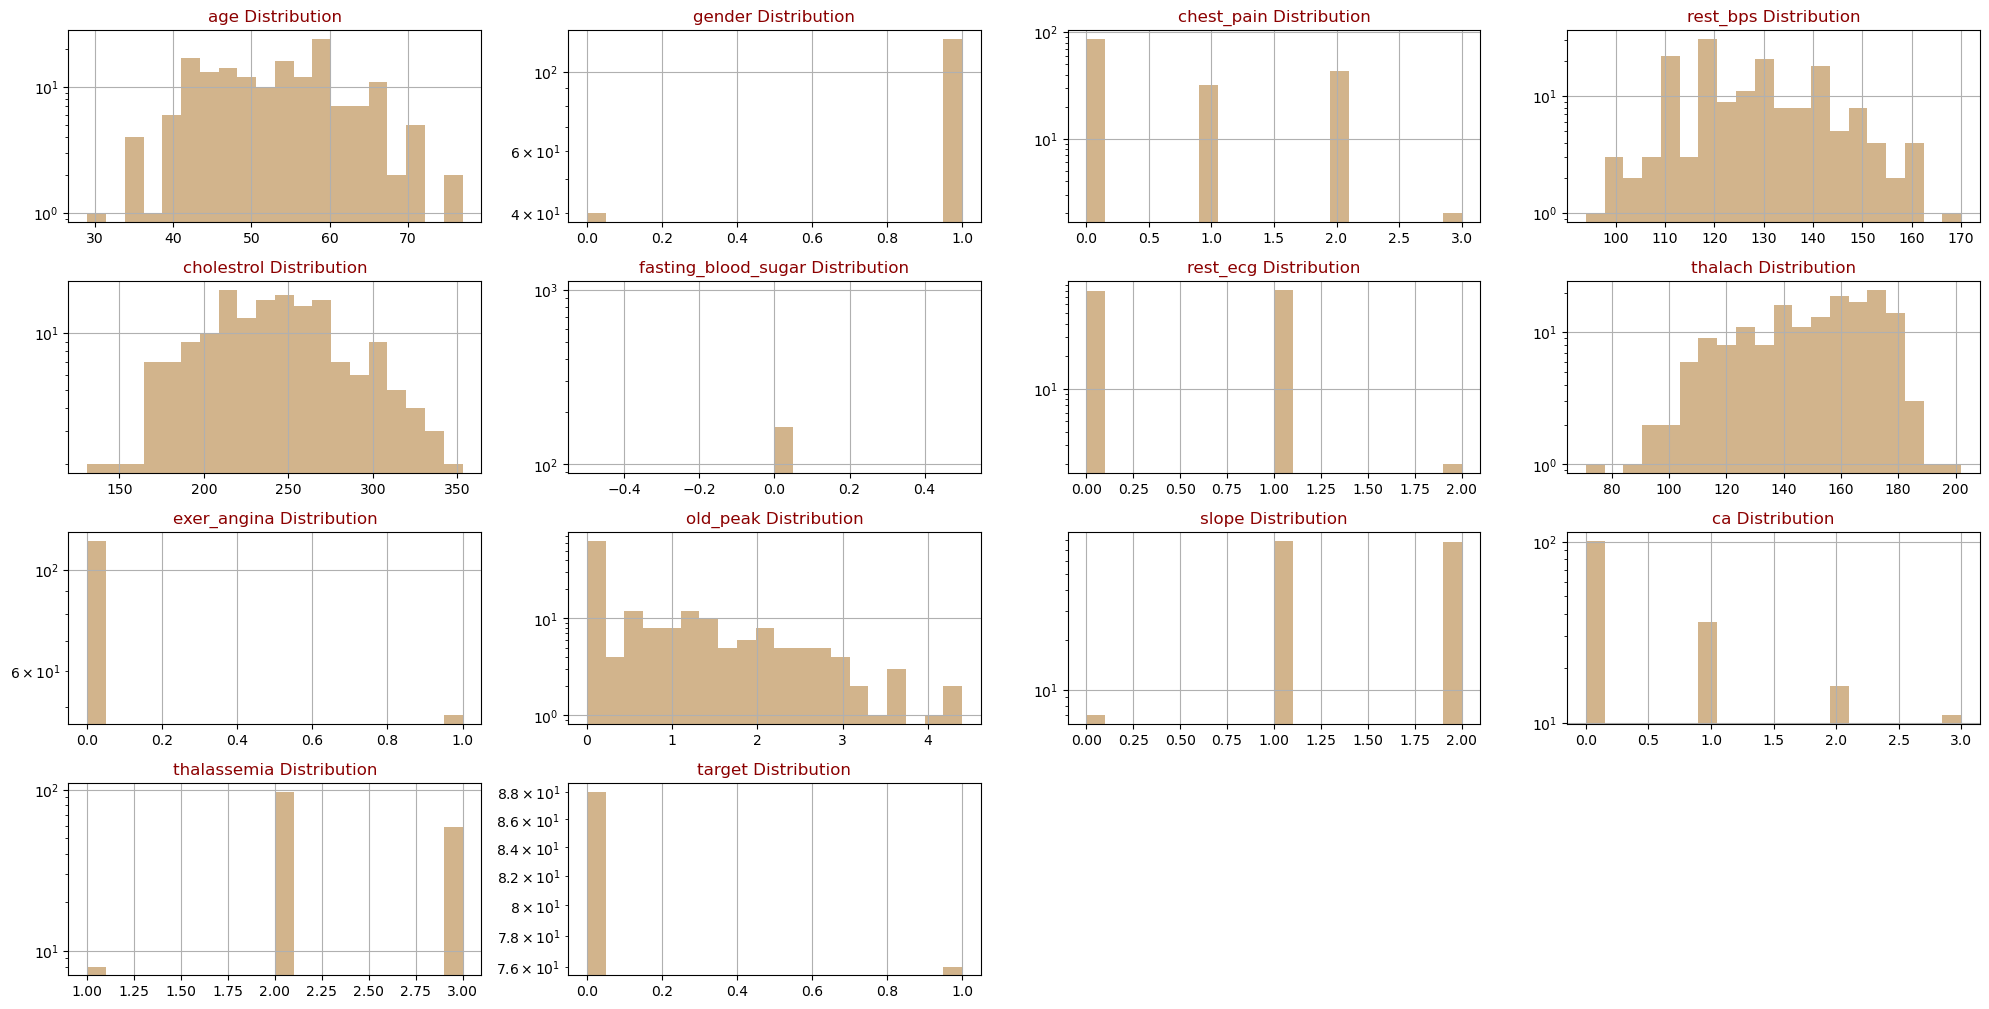

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    colors = ['tan']
    
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor=colors[i % len(colors)])
        ax.set_title(feature + " Distribution", color='DarkRed')
        ax.set_yscale('log')  # Set y-axis to a logarithmic scale for better visibility
    fig.tight_layout()  
    plt.show()

# Plot histograms for all columns in the dataset in an 8x4 grid with different colors for each plot
draw_histograms(data, data.columns, 8, 4)

#### Observations:

**1. Age:** 
The distribution of age appears to be fairly uniform between ages 40 and 65, with fewer samples for younger and older individuals. This suggests that the dataset covers a broad middle-aged to elderly population, which is typical for heart disease studies.

**2. Gender:** 
The distribution is highly imbalanced, with significantly more males (gender = 1) than females (gender = 0). This imbalance might need to be considered during model training, as it could influence predictions.

**3. Chest Pain:** 
There seems to be a range of values for chest pain, likely corresponding to different types of chest pain experienced by patients. There is a notable spike around a value of 1, which may represent a common form of chest pain related to heart disease.

**4. Resting Blood Pressure (rest_bps):** 
The distribution of resting blood pressure is roughly bell-shaped, centering around 120-140, which is within the typical range for this measurement.

**5. Cholesterol:** 
Cholesterol levels exhibit a relatively normal distribution, peaking around 240-260, which is slightly elevated compared to healthy levels, suggesting that high cholesterol is common in this dataset.

**6. Fasting Blood Sugar:** 
The distribution of fasting blood sugar is highly skewed, with most values being either 0 or 1. This is likely a binary feature (0: fasting blood sugar < 120 mg/dL, 1: fasting blood sugar ≥ 120 mg/dL).

**7. Resting ECG:** 
The distribution is discrete, possibly indicating different types of resting ECG results. There is a concentration around values of 0 and 1, showing that most patients fall into these categories.

**8. Max Heart Rate (thalach):** 
The maximum heart rate distribution is slightly right-skewed, with most values ranging between 140 and 180, which is expected for an aging population.

**9. Old Peak:** 
The distribution of the old peak (ST depression) shows a right-skewed shape, with many patients having low values but some showing larger values, which could indicate more severe heart conditions.


#### <div style="color: green;"> KDE Plot Analysis:</div>

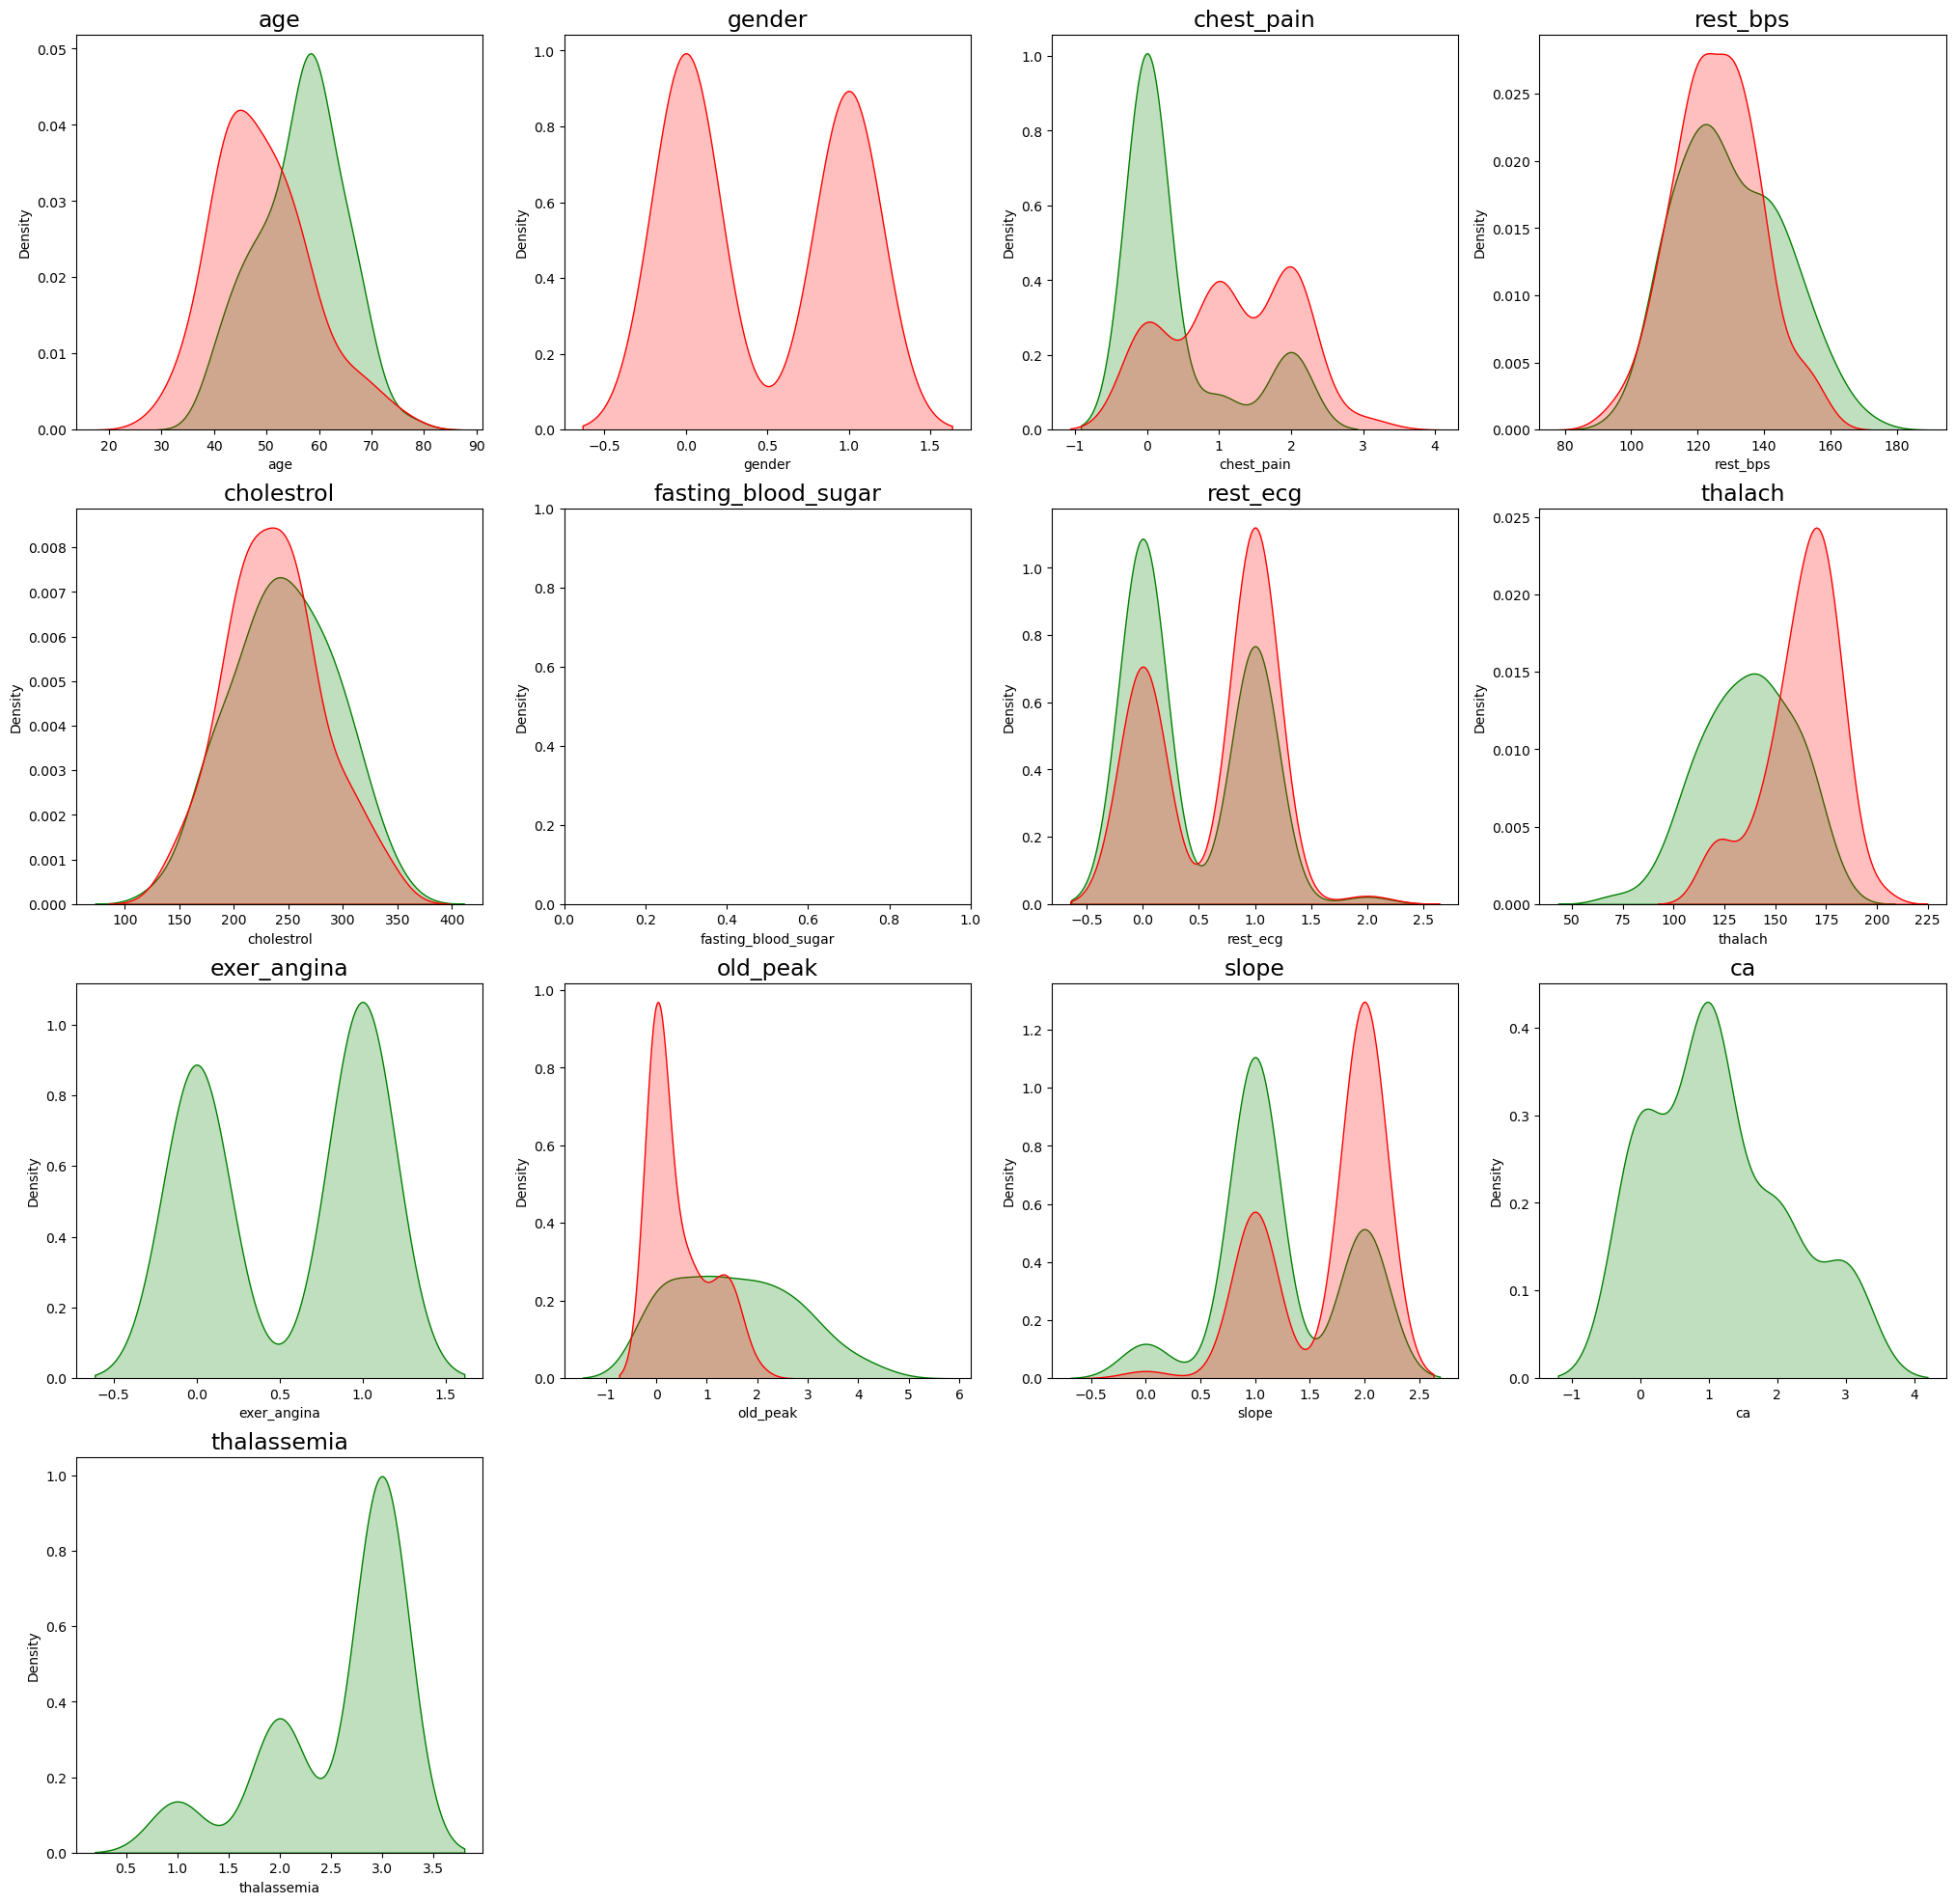

In [16]:
Heart_Disease = data['target'] == 1
No_Heart_Disease = data['target'] == 0

x = data.drop(['target'], axis = 1)
cols = list(x.columns.values)

plt.figure(figsize=(25,50))
for n , col in enumerate(cols):
    plt.subplot(8,4,n+1)
    sns.kdeplot(x[No_Heart_Disease][col], color= 'green', fill=True)
    sns.kdeplot(x[Heart_Disease][col], color= 'red', fill=True)
    plt.title(col, fontsize= 17)
plt.show()

#### <div style="color: green;"> Distribution of independent variables:</div>

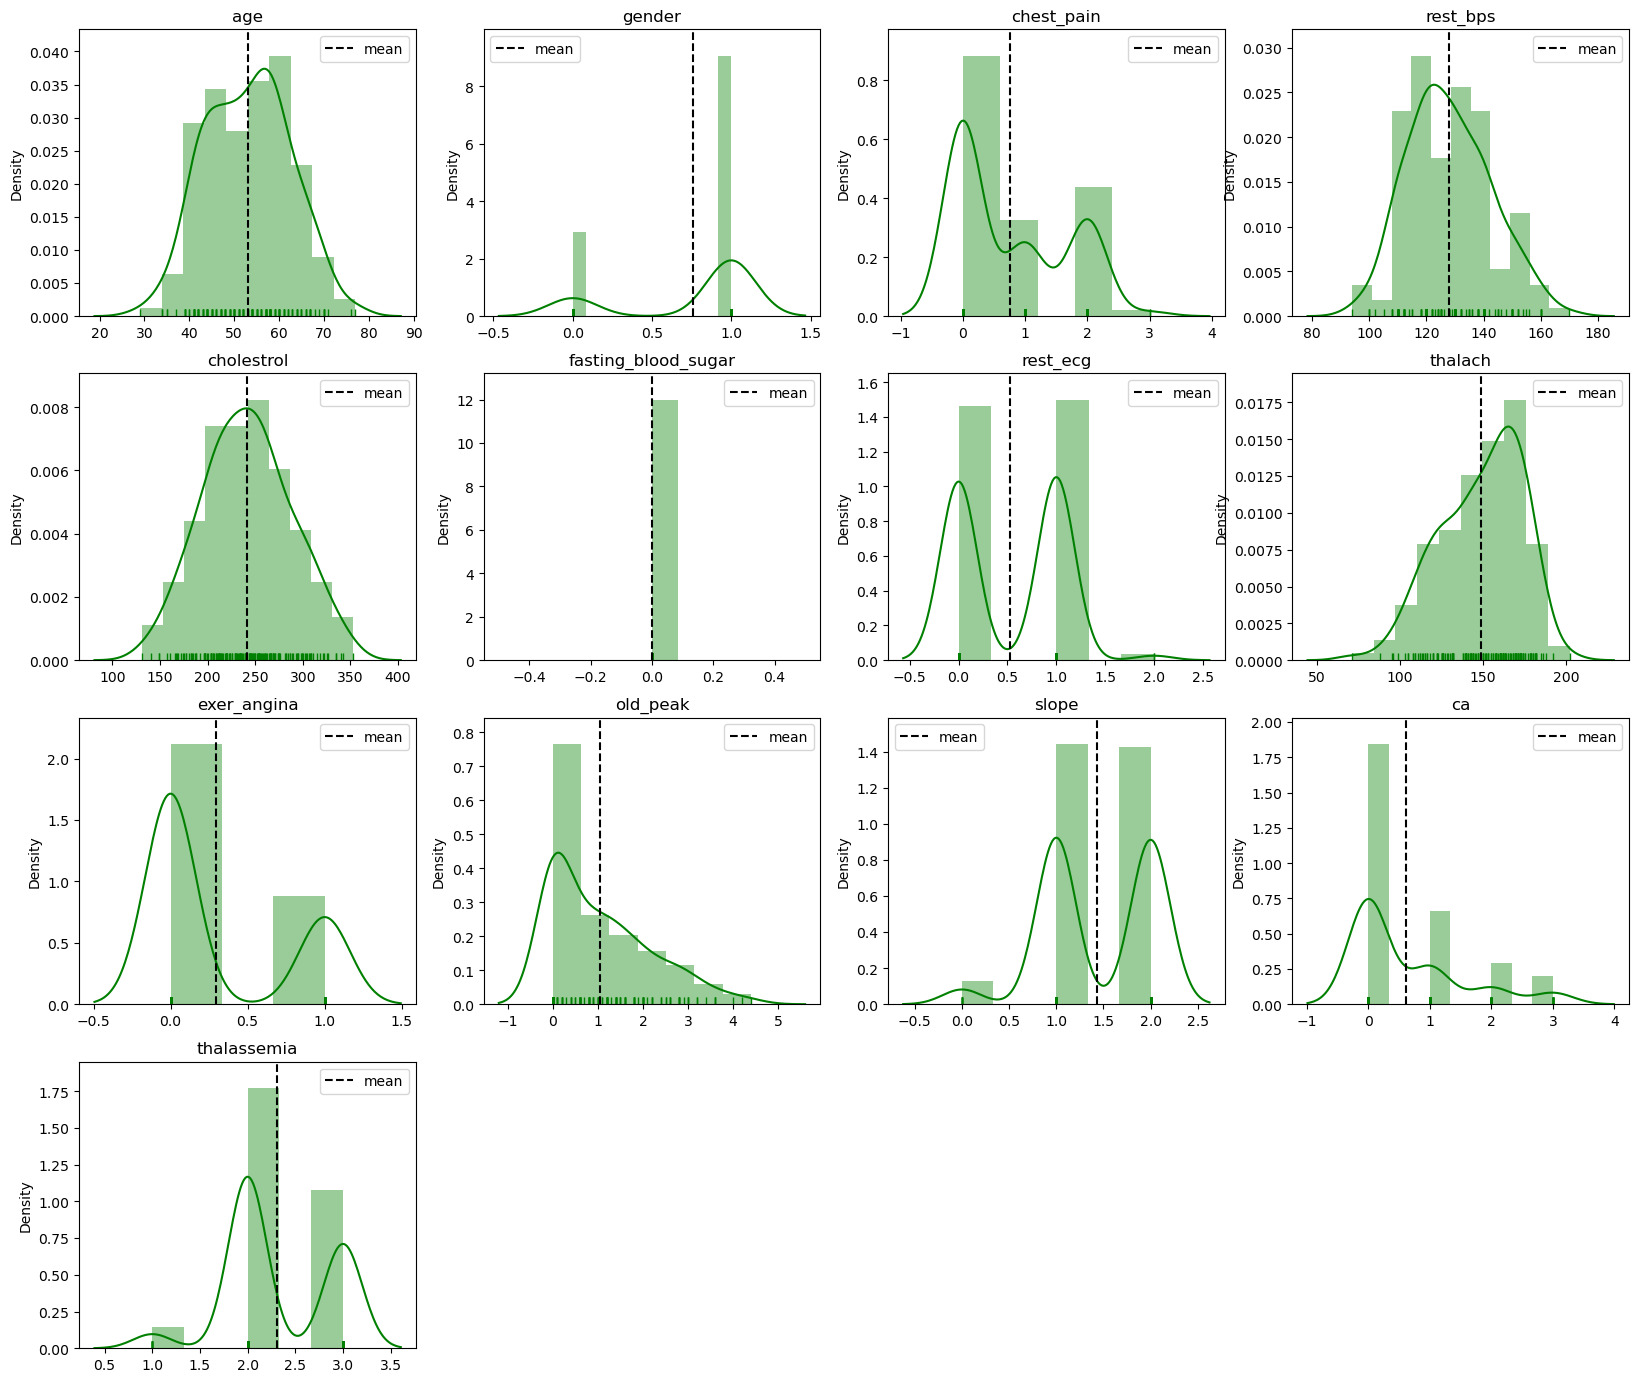

In [17]:
import itertools

cols = [i for i in data.columns if i != 'target']

fig = plt.figure(figsize=(20, 35))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(8,4,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

#### <div style="color: green;"> Distribution of dependent variable:</div>

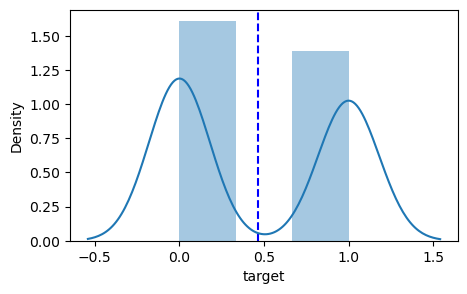

In [18]:
fig = plt.figure(figsize=(5, 3))
plt.axvline(data.target.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.target);

#### <div style="color: green;"> Correlation of target variable with features:</div>

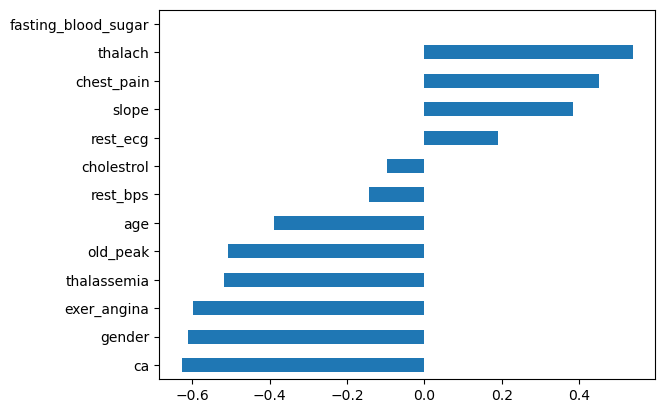

In [19]:
# Correlation of target variable with features after numerical transformation 


numerical_data = data.select_dtypes(include=[np.number])
correlation_series = numerical_data.corr()['target'][:-1].sort_values()
correlation_series.plot.barh();

#### Observation:

- **Fasting blood sugar** shows the strongest positive correlation.
- **Thalach** (maximum heart rate achieved) and **chest pain** also have positive correlations.
- **ca** (number of major vessels colored), **gender**, and **exercise-induced angina** (exer_angina) have strong negative correlations, suggesting that higher values of these may be associated with a reduced likelihood of heart disease.

### <div style="color: gray;">Step 3:Model Training and Performance Evaluation-</div> 

#### <div style="color: green;"> Split the dataset into training and testing sets:</div>

In [20]:
# Separate properties and target variable

X = data.drop("target", axis=1)
Y = data.target

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 4, test_size = 0.2)

In [22]:
x_train.shape, y_train.shape

((131, 13), (131,))

In [23]:
x_test.shape, y_test.shape

((33, 13), (33,))

#### <div style="color: green;"> Normalizing the data:</div>

In [24]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

#### <div style="color: green;"> All Classification Model Training and Evaluation:</div>

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [26]:
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [27]:
clfs = {
    'SVC' : svc,
    'NB': gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [28]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    try:
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        return accuracy, precision, recall, f1
    except Exception as e:
        print(f"Error with classifier {clf.__class__.__name__}: {str(e)}")
        return None, None

#### <div style="color: green;">Evaluate Performence:</div>

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay
from termcolor import colored

In [30]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9393939393939394
Precision -  0.9411764705882353
Recall -  0.9411764705882353
F1 -  0.9411764705882353
For  NB
Accuracy -  0.696969696969697
Precision -  1.0
Recall -  0.4117647058823529
F1 -  0.5833333333333334
For  DT
Accuracy -  0.9393939393939394
Precision -  1.0
Recall -  0.8823529411764706
F1 -  0.9375
For  LR
Accuracy -  0.9393939393939394
Precision -  1.0
Recall -  0.8823529411764706
F1 -  0.9375
For  RF
Accuracy -  0.9696969696969697
Precision -  1.0
Recall -  0.9411764705882353
F1 -  0.9696969696969697
For  AdaBoost
Accuracy -  0.9393939393939394
Precision -  1.0
Recall -  0.8823529411764706
F1 -  0.9375
For  BgC
Accuracy -  0.9393939393939394
Precision -  1.0
Recall -  0.8823529411764706
F1 -  0.9375
For  ETC
Accuracy -  0.9696969696969697
Precision -  1.0
Recall -  0.9411764705882353
F1 -  0.9696969696969697
For  GBDT
Accuracy -  0.9696969696969697
Precision -  1.0
Recall -  0.9411764705882353
F1 -  0.9696969696969697
For  xgb
Accuracy -  0.9090909090

In [31]:
performance_data = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1':f1_scores})

In [32]:
performance_data

,Algorithm,Accuracy,Precision,Recall,F1
0,SVC,0.939394,0.941176,0.941176,0.941176
1,NB,0.696970,1.000000,0.411765,0.583333
2,DT,0.939394,1.000000,0.882353,0.937500
3,LR,0.939394,1.000000,0.882353,0.937500
4,RF,0.969697,1.000000,0.941176,0.969697
5,AdaBoost,0.939394,1.000000,0.882353,0.937500
6,BgC,0.939394,1.000000,0.882353,0.937500
7,ETC,0.969697,1.000000,0.941176,0.969697
8,GBDT,0.969697,1.000000,0.941176,0.969697
9,xgb,0.909091,0.850000,1.000000,0.918919


In [33]:
performance_data.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1
4,RF,0.969697,1.000000,0.941176,0.969697
7,ETC,0.969697,1.000000,0.941176,0.969697
8,GBDT,0.969697,1.000000,0.941176,0.969697
0,SVC,0.939394,0.941176,0.941176,0.941176
2,DT,0.939394,1.000000,0.882353,0.937500
3,LR,0.939394,1.000000,0.882353,0.937500
5,AdaBoost,0.939394,1.000000,0.882353,0.937500
6,BgC,0.939394,1.000000,0.882353,0.937500
9,xgb,0.909091,0.850000,1.000000,0.918919
1,NB,0.696970,1.000000,0.411765,0.583333


#### <div style="color: green;">Performance Observation:</div>

**1. Best Performing Models (Based on Accuracy & F1 Score):**
Random Forest (RF), Extra Trees Classifier (ETC), and Gradient Boosting Decision Trees (GBDT) all show the highest accuracy (0.9697) and strong F1 scores (0.9697), indicating excellent overall performance.

**2. High Precision & High Recall Models:**
Naive Bayes (NB) shows perfect precision (1.0), but it suffers from low recall (0.4118), suggesting it's overly conservative, predicting fewer positives. This leads to fewer false positives but at the cost of many false negatives.

**3. Balanced Performance Models:**
SVC, Logistic Regression (LR), and Decision Tree (DT) all maintain a good balance between precision and recall with very similar metrics. These are reliable models with consistent behavior across different metrics.

**4. XGBoost:**
XGB performs reasonably well with an accuracy of 0.9091, but its precision is slightly lower (0.85), although its recall is perfect. It might predict slightly more false positives compared to other models but still does well overall with a decent F1 score (0.9189).

### <div style="color: gray;">Step 4: Comparative Analysis-</div>

#### <div style="color: green;">Summary:</div>

- For the best accuracy and F1 score, **Random Forest**, **ETC**, or **GBDT** are the top choices.
- For applications where false negatives are costly, **XGB** or **SVC** might be useful due to their high recall.
- If avoiding false positives is critical, **Naive Bayes** would be effective, but you would need to address its low recall.